**#PROJECT: Credit Card Fraud Detection**

#Problem Statement
Credit card fraud is a major concern for financial institutions, leading to significant financial losses and undermining customer trust. Detecting fraudulent transactions in real-time is challenging due to the high imbalance between legitimate and fraudulent transactions and the evolving patterns of fraud.

The dataset contains anonymized transaction records, with features representing transaction characteristics and a target variable indicating whether a transaction is fraudulent (1) or legitimate (0). The goal is to develop a predictive model that can identify potentially fraudulent transactions accurately, minimizing both false positives and false negatives.

Goal

To detect fraudulent credit card transactions effectively using machine learning techniques, helping banks and financial institutions reduce financial losses and improve transaction security.

Objectives

1.Analyze the dataset to understand its structure, feature distributions, and the extent of class imbalance.

2.Handle class imbalance using techniques such as SMOTE (oversampling) or undersampling to ensure the model learns effectively from the minority class (fraud cases).

3.Train and evaluate machine learning models, including:

Logistic Regression

Random Forest

4.Measure performance using metrics suitable for imbalanced datasets, such as:

Precision-Recall curve

PR-AUC (Precision-Recall Area Under Curve)

5.Identify key patterns or features that indicate suspicious transactions, helping explain why certain transactions are flagged as fraud.

6.Provide actionable insights to guide financial institutions in fraud prevention strategies.

Expected Outcomes

1.Accurate detection of fraudulent transactions, minimizing both false positives (legitimate transactions flagged as fraud) and false negatives (fraudulent transactions missed).

2.Performance comparison of models using PR-AUC, helping select the most effective model for deployment.

3.Insights into top contributing features (transaction patterns) that influence the likelihood of fraud, providing transparency and interpretability to stakeholders.

4.Improved fraud management, assisting banks in making data-driven decisions for real-time fraud prevention.

# DATA UNDERSTANDING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154616,102213.0,-2.881177,3.042352,-2.037665,-2.067920,1.730641,-0.563490,1.903018,-0.768910,3.824377,...,-0.551010,0.444579,-0.285562,-0.282634,0.313974,-0.020883,0.758800,-0.037270,0.92,0.0
154617,102215.0,-0.375306,0.532730,0.418723,-1.287062,2.497517,4.122187,-0.287799,1.051660,1.371592,...,-0.272822,-0.576719,-0.039171,0.603659,-0.315255,-0.548130,0.152472,0.134190,4.99,0.0
154618,102227.0,2.026881,-0.097897,-0.738827,0.234993,-0.148646,-0.677590,-0.269752,-0.135180,1.710316,...,-0.586819,-1.534632,0.521472,-0.470581,-0.761147,-0.015124,-0.104300,-0.069280,6.04,0.0
154619,102229.0,-0.099578,1.072275,-1.153646,0.116668,1.755453,1.663162,0.414888,0.515391,-0.042438,...,0.158546,0.861983,-0.007750,-1.217354,-0.874381,1.800225,0.014189,0.089533,24.99,0.0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154616,102213.0,-2.881177,3.042352,-2.037665,-2.067920,1.730641,-0.563490,1.903018,-0.768910,3.824377,...,-0.551010,0.444579,-0.285562,-0.282634,0.313974,-0.020883,0.758800,-0.037270,0.92,0.0
154617,102215.0,-0.375306,0.532730,0.418723,-1.287062,2.497517,4.122187,-0.287799,1.051660,1.371592,...,-0.272822,-0.576719,-0.039171,0.603659,-0.315255,-0.548130,0.152472,0.134190,4.99,0.0
154618,102227.0,2.026881,-0.097897,-0.738827,0.234993,-0.148646,-0.677590,-0.269752,-0.135180,1.710316,...,-0.586819,-1.534632,0.521472,-0.470581,-0.761147,-0.015124,-0.104300,-0.069280,6.04,0.0
154619,102229.0,-0.099578,1.072275,-1.153646,0.116668,1.755453,1.663162,0.414888,0.515391,-0.042438,...,0.158546,0.861983,-0.007750,-1.217354,-0.874381,1.800225,0.014189,0.089533,24.99,0.0
154620,102233.0,1.502475,-0.122551,-0.002615,3.722850,0.534492,2.229096,-0.735919,0.566677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154621 entries, 0 to 154620
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    154621 non-null  float64
 1   V1      154621 non-null  float64
 2   V2      154621 non-null  float64
 3   V3      154621 non-null  float64
 4   V4      154621 non-null  float64
 5   V5      154621 non-null  float64
 6   V6      154621 non-null  float64
 7   V7      154621 non-null  float64
 8   V8      154621 non-null  float64
 9   V9      154620 non-null  float64
 10  V10     154620 non-null  float64
 11  V11     154620 non-null  float64
 12  V12     154620 non-null  float64
 13  V13     154620 non-null  float64
 14  V14     154620 non-null  float64
 15  V15     154620 non-null  float64
 16  V16     154620 non-null  float64
 17  V17     154620 non-null  float64
 18  V18     154620 non-null  float64
 19  V19     154620 non-null  float64
 20  V20     154620 non-null  float64
 21  V21     15

In [ ]:
df.shape

(154621, 31)

# Data Cleaning

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,1


In [ ]:
df.duplicated().sum()

np.int64(594)

In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154616,102213.0,-2.881177,3.042352,-2.037665,-2.067920,1.730641,-0.563490,1.903018,-0.768910,3.824377,...,-0.551010,0.444579,-0.285562,-0.282634,0.313974,-0.020883,0.758800,-0.037270,0.92,0.0
154617,102215.0,-0.375306,0.532730,0.418723,-1.287062,2.497517,4.122187,-0.287799,1.051660,1.371592,...,-0.272822,-0.576719,-0.039171,0.603659,-0.315255,-0.548130,0.152472,0.134190,4.99,0.0
154618,102227.0,2.026881,-0.097897,-0.738827,0.234993,-0.148646,-0.677590,-0.269752,-0.135180,1.710316,...,-0.586819,-1.534632,0.521472,-0.470581,-0.761147,-0.015124,-0.104300,-0.069280,6.04,0.0
154619,102229.0,-0.099578,1.072275,-1.153646,0.116668,1.755453,1.663162,0.414888,0.515391,-0.042438,...,0.158546,0.861983,-0.007750,-1.217354,-0.874381,1.800225,0.014189,0.089533,24.99,0.0


# Descriptive statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,154621.0,55474.997717,22852.281523,0.000000,39484.000000,56991.000000,74092.000000,102233.000000
V1,154621.0,-0.230271,1.843698,-56.407510,-1.019305,-0.253001,1.166479,2.401777
V2,154621.0,0.045342,1.623913,-72.715728,-0.539527,0.118562,0.804929,21.467203
V3,154621.0,0.599491,1.335149,-33.680984,0.089993,0.701449,1.335444,9.382558
V4,154621.0,0.136656,1.354872,-5.519697,-0.721838,0.156487,0.974108,16.875344
V5,154621.0,-0.234824,1.330333,-42.147898,-0.871639,-0.277476,0.297749,34.801666
V6,154621.0,0.070439,1.290770,-26.160506,-0.675067,-0.186751,0.459224,22.529298
V7,154621.0,-0.105147,1.210456,-41.506796,-0.600160,-0.051474,0.435270,36.677268
V8,154621.0,0.049639,1.246170,-73.216718,-0.144312,0.072405,0.367431,20.007208
V9,154620.0,-0.019793,1.140255,-13.434066,-0.681885,-0.111027,0.584393,15.594995


In [ ]:
df['Class'].value_counts()


,count
Class,
0.0,154282
1.0,338


# Data visualization

<Axes: xlabel='Time', ylabel='Count'>

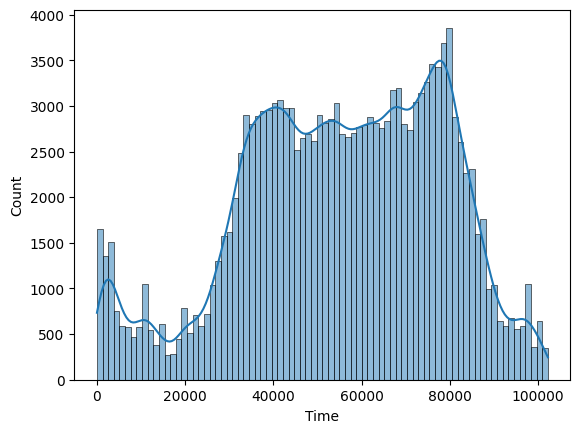

In [ ]:
sns.histplot(df['Time'], kde=True)


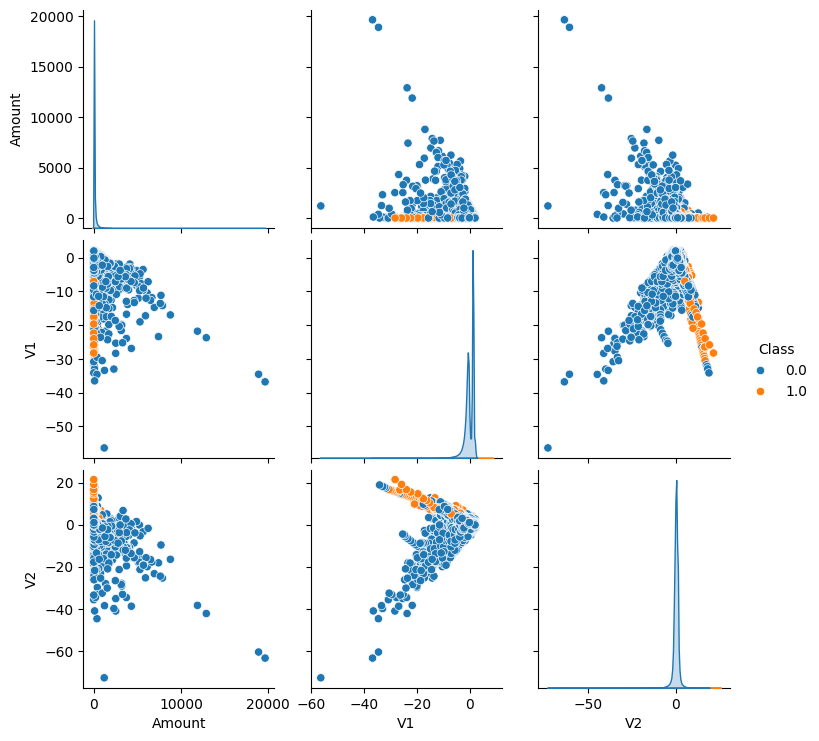

In [ ]:
sns.pairplot(df[['Amount', 'V1', 'V2', 'Class']], hue='Class')
plt.show()


# Feature enginering

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Class'] = label.fit_transform(df['Class'])
print("Encoding complete")


Encoding complete


In [ ]:
a = df.select_dtypes(include='bool').columns
for col in a:
    df[col] = df[col].astype('int64')
print('Completed')
df.info()

Completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154621 entries, 0 to 154620
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    154621 non-null  float64
 1   V1      154621 non-null  float64
 2   V2      154621 non-null  float64
 3   V3      154621 non-null  float64
 4   V4      154621 non-null  float64
 5   V5      154621 non-null  float64
 6   V6      154621 non-null  float64
 7   V7      154621 non-null  float64
 8   V8      154621 non-null  float64
 9   V9      154620 non-null  float64
 10  V10     154620 non-null  float64
 11  V11     154620 non-null  float64
 12  V12     154620 non-null  float64
 13  V13     154620 non-null  float64
 14  V14     154620 non-null  float64
 15  V15     154620 non-null  float64
 16  V16     154620 non-null  float64
 17  V17     154620 non-null  float64
 18  V18     154620 non-null  float64
 19  V19     154620 non-null  float64
 20  V20     154620 non-null  float64
 21  

# Correlation Analysis

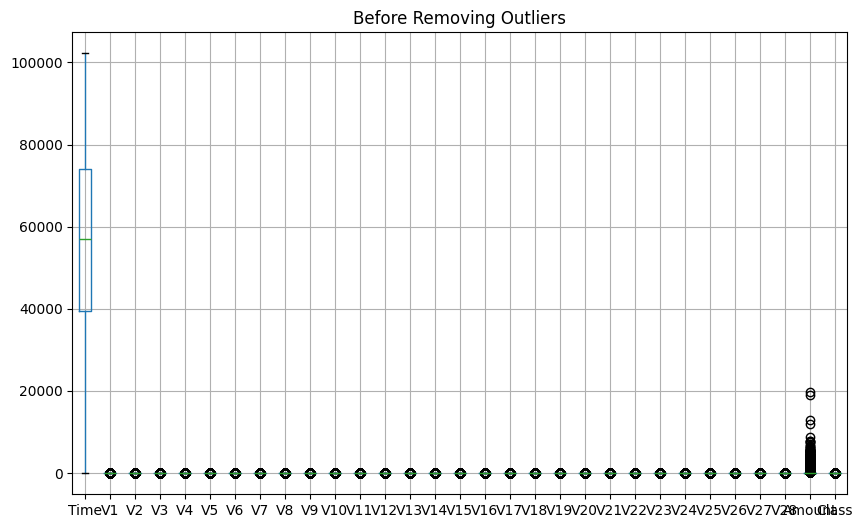

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title("Before Removing Outliers")
plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.018902  0.028348 -0.109058 -0.028413  0.035026 -0.025685   
V1      0.018902  1.000000 -0.017216  0.183229 -0.042101  0.019545  0.050286   
V2      0.028348 -0.017216  1.000000 -0.117603  0.032696 -0.046126  0.013692   
V3     -0.109058  0.183229 -0.117603  1.000000 -0.068284  0.143542 -0.056187   
V4     -0.028413 -0.042101  0.032696 -0.068284  1.000000 -0.007432 -0.026929   
V5      0.035026  0.019545 -0.046126  0.143542 -0.007432  1.000000  0.056993   
V6     -0.025685  0.050286  0.013692 -0.056187 -0.026929  0.056993  1.000000   
V7      0.010546  0.103465 -0.032214  0.198413 -0.036526  0.023104  0.012879   
V8     -0.005588  0.003017 -0.011883 -0.068583  0.018251 -0.011178 -0.041521   
V9     -0.049004 -0.025814 -0.000081  0.056428  0.006330  0.052000  0.027844   
V10     0.012302 -0.004666  0.021779  0.105162 -0.078414  0.066149 -0.009416   
V11    -0.107950  0.011517  0.028776 -0.

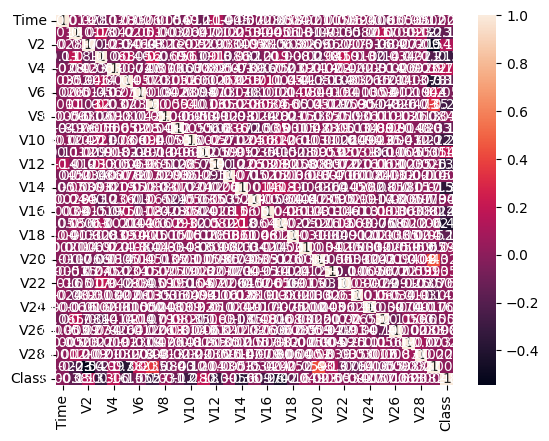

In [ ]:
corr =df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df.corr(numeric_only=True)['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V11,0.182321
V4,0.163032
V2,0.125658
V21,0.054524
V19,0.048880
V8,0.030592
V27,0.023151
V20,0.022677
V28,0.008152


In [ ]:
df.to_csv("df_test.csv", index=False)
df = pd.read_csv('df_test.csv')
print("Proceeding with model training using cleaned training data.")
df

Proceeding with model training using cleaned training data.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154616,102213.0,-2.881177,3.042352,-2.037665,-2.067920,1.730641,-0.563490,1.903018,-0.768910,3.824377,...,-0.551010,0.444579,-0.285562,-0.282634,0.313974,-0.020883,0.758800,-0.037270,0.92,0
154617,102215.0,-0.375306,0.532730,0.418723,-1.287062,2.497517,4.122187,-0.287799,1.051660,1.371592,...,-0.272822,-0.576719,-0.039171,0.603659,-0.315255,-0.548130,0.152472,0.134190,4.99,0
154618,102227.0,2.026881,-0.097897,-0.738827,0.234993,-0.148646,-0.677590,-0.269752,-0.135180,1.710316,...,-0.586819,-1.534632,0.521472,-0.470581,-0.761147,-0.015124,-0.104300,-0.069280,6.04,0
154619,102229.0,-0.099578,1.072275,-1.153646,0.116668,1.755453,1.663162,0.414888,0.515391,-0.042438,...,0.158546,0.861983,-0.007750,-1.217354,-0.874381,1.800225,0.014189,0.089533,24.99,0


# Identify Imbalance Ratio

In [ ]:
df['Class'].value_counts()
fraud = df['Class'].value_counts()[1]
normal = df['Class'].value_counts()[0]
ratio = fraud / normal
print("Imbalance Ratio:", ratio)


Imbalance Ratio: 0.002190793482065309


# Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve, auc)
from imblearn.over_sampling import SMOTE

# Select feature

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
print(X.shape, y.shape)


(154621, 30) (154621,)


In [ ]:
df_cleaned = df[df['Class'] != 2]
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#Apply SMOTE (Solve Imbalance)

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0    115711
1       254
Name: count, dtype: int64
After SMOTE: Class
0    115711
1    115711
Name: count, dtype: int64


# Train Logistic Regression

In [ ]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_res_scaled, y_train_res)


LogisticRegression(max_iter=5000)

# Train Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)



RandomForestClassifier(max_depth=12, n_estimators=50, n_jobs=-1,
                       random_state=42)

# Precision–Recall Curve

        # Logistic Regression PR Curve

In [ ]:
y_probs_log = log_model.predict_proba(X_test_scaled)[:,1]
precision_log, recall_log, _ = precision_recall_curve(y_test, y_probs_log)
pr_auc_log = auc(recall_log, precision_log)

    # Random Forest PR Curve

In [ ]:
y_probs_rf = rf_model.predict_proba(X_test)[:,1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)
pr_auc_rf = auc(recall_rf, precision_rf)


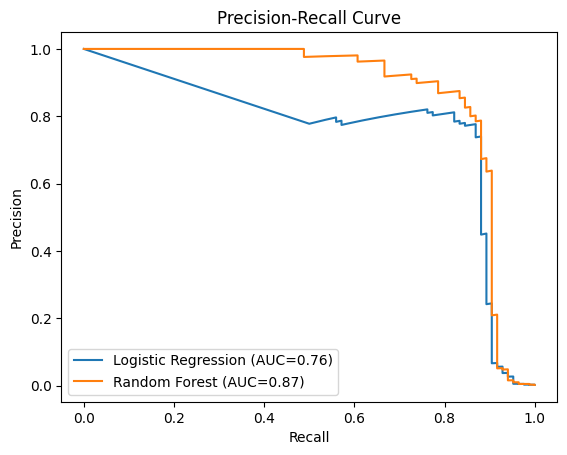

In [ ]:
plt.plot(recall_log, precision_log, label=f'Logistic Regression (AUC={pr_auc_log:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC={pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Compare AUC Scores

In [ ]:
print(f"PR-AUC Logistic Regression: {pr_auc_log:.3f}")
print(f"PR-AUC Random Forest: {pr_auc_rf:.3f}")


PR-AUC Logistic Regression: 0.758
PR-AUC Random Forest: 0.871


# Output Top 5 Fraud Patterns

In [ ]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 5 suspicious patterns/features:")
print(feat_imp.head(5))



Top 5 suspicious patterns/features:
   Feature  Importance
14     V14    0.319117
3       V3    0.135082
10     V10    0.113574
17     V17    0.091410
4       V4    0.070149


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top 5 suspicious patterns/features (Logistic Regression):")
print(coef_df.head(5))


Top 5 suspicious patterns/features (Logistic Regression):
   Feature  Coefficient
14     V14    -8.618719
17     V17    -6.814399
12     V12    -6.500874
7       V7    -4.767729
1       V1     4.700437


In [ ]:
time = float(input("Enter transaction time (in seconds): "))
amount = float(input("Enter transaction amount: "))
V1  = float(input("Enter V1 value: "))
V2  = float(input("Enter V2 value: "))
V3  = float(input("Enter V3 value: "))
V4  = float(input("Enter V4 value: "))
V5  = float(input("Enter V5 value: "))
V6  = float(input("Enter V6 value: "))
V7  = float(input("Enter V7 value: "))
V8  = float(input("Enter V8 value: "))
V9  = float(input("Enter V9 value: "))
V10 = float(input("Enter V10 value: "))
V11 = float(input("Enter V11 value: "))
V12 = float(input("Enter V12 value: "))
V13 = float(input("Enter V13 value: "))
V14 = float(input("Enter V14 value: "))
V15 = float(input("Enter V15 value: "))
V16 = float(input("Enter V16 value: "))
V17 = float(input("Enter V17 value: "))
V18 = float(input("Enter V18 value: "))
V19 = float(input("Enter V19 value: "))
V20 = float(input("Enter V20 value: "))
V21 = float(input("Enter V21 value: "))
V22 = float(input("Enter V22 value: "))
V23 = float(input("Enter V23 value: "))
V24 = float(input("Enter V24 value: "))
V25 = float(input("Enter V25 value: "))
V26 = float(input("Enter V26 value: "))
V27 = float(input("Enter V27 value: "))
V28 = float(input("Enter V28 value: "))
user_input = [[
    time, V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,
    V11,V12,V13,V14,V15,V16,V17,V18,
    V19,V20,V21,V22,V23,V24,V25,V26,V27,V28, amount
]]

model = log_model
user_df = pd.DataFrame(user_input, columns=X.columns)
user_df_scaled = scaler.transform(user_df)
prediction = model.predict(user_df_scaled)[0]

if prediction == 1:
    print("\n ALERT: This transaction is **FRAUDULENT**!")
else:
    print("\n This transaction is **LEGITIMATE**.")


Enter transaction time (in seconds): 7
Enter transaction amount: 5900
Enter V1 value: 6
Enter V2 value: 8
Enter V3 value: 9
Enter V4 value: 1
Enter V5 value: 2
Enter V6 value: 3
Enter V7 value: 4
Enter V8 value: 5
Enter V9 value: 6
Enter V10 value: 7
Enter V11 value: 8
Enter V12 value: 9
Enter V13 value: 9
Enter V14 value: 8
Enter V15 value: 7
Enter V16 value: 6
Enter V17 value: 5
Enter V18 value: 4
Enter V19 value: 3
Enter V20 value: 2
Enter V21 value: 1
Enter V22 value: 2
Enter V23 value: 3
Enter V24 value: 4
Enter V25 value: 5
Enter V26 value: 6
Enter V27 value: 7
Enter V28 value: 8

 ALERT: This transaction is **FRAUDULENT**!


**DOCUMENTATION**

Credit card fraud is a significant challenge for financial institutions, causing substantial financial losses and affecting customer trust. Detecting fraudulent transactions is difficult due to the extreme imbalance between legitimate and fraudulent transactions, as fraud cases represent a very small fraction of all transactions. This project focuses on analyzing a credit card transaction dataset and building machine learning models to identify suspicious transactions accurately. The dataset contains anonymized transaction features and a target variable indicating whether a transaction is fraudulent (1) or legitimate (0).

The primary objectives are to handle class imbalance using techniques like SMOTE, train and evaluate models such as Logistic Regression and Random Forest, and measure performance using Precision-Recall curves and PR-AUC. Additionally, the project aims to identify key patterns or features that make transactions suspicious, providing actionable insights for fraud prevention. The expected outcome is a robust model that can accurately detect fraudulent transactions while highlighting the top contributing factors, assisting financial institutions in mitigating risks and improving transaction security.